# Spherical Galaxy Clusters
![author_button](https://img.shields.io/badge/Written_By:-Eliza_Diggins-blue)

---

This example will walk you through generating a spherically symmetric galaxy cluster using ``pisces``. Galaxy clusters are (in idealized models) spherically symmetric systems with a gasseous intra-cluster plasma (the ICM) which is supported against collapse by thermal pressure, a host dark matter halo, and a stellar component. In many cases, the stellar component may be left out as it has a minimal impact on the ICM in simulations. In this case, we're going to do the following:

1. We'll create a generic spherical geometry object from ``pisces.geometry.coordinate_systems``.
2. We'll initialize our galaxy cluster using two [NFW Profiles](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile), one for the gas density
   and one for the total density.

We can then pass this information to the model and it will compute the necessary fields to complete the model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Geometry Setup

One of the first steps whenever you are creating a model with Pisces is to build the coordinate system for your model. Because this model is spherical, we don't have to put much thought into it - we just import ``SphericalCoordinateSystem`` from ``pisces.geometry.coordinate_systems`` and initialize it.

In [2]:
# Import the spherical coordinate system class from pisces.
from pisces.geometry.coordinate_systems import SphericalCoordinateSystem

# initialize the coordinate system
coordinate_system = SphericalCoordinateSystem()

Pisces : [INFO     ] 2025-03-02 16:35:08,270 Preparing Lame Coefficients for SphericalCoordinateSystem instance. This may take a few seconds...
Pisces : [INFO     ] 2025-03-02 16:35:08,320 Preparing derived attributes for SphericalCoordinateSystem instance. This may take a few seconds...
Pisces : [INFO     ] 2025-03-02 16:35:08,324 Lambdifying attributes...


The output above tells us that the various symbolic components of the coordinate system have been computed and set up. Coordinate systems in Pisces can be a little bit complex - you can look at the coordinate system documentation / guides for more details - but in this case, everything is quite simple.

## Density Profiles

Now that we have a coordinate system, the next task is to build the profiles for our galaxy clusters. We want two [NFW Profiles](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile) of the correct general properties to be valid for a galaxy cluster. The NFW profiles in Pisces require a $\rho_0$ and $r_s$ parameter to be specified. Generally, $r_s$ is on the order of 100's of kpc in galaxy clusters. For such a system, the virial radius is $\sim 4 r_s$ and so the virial mass is similar to

$$M_{\rm vir} \approx 1.4 \left[\frac{4}{3}\rho_0\pi r_s^3\right] \implies \rho_0 \approx \frac{3M_{\rm vir}}{4 \pi r_s^3}.$$

For a virial mass around $10^{15}\,{\rm M}_{\odot},$ we need a $\rho_0 \sim 1 \times 10^7 {\rm \frac{M_\odot}{kpc^3}}$.

For the density profile, we'll use a slightly steeper profile with only about 15% of the total mass.

| Field              | Profile | $\rho_0$                                     | $r_0$             |
|--------------------|---------|----------------------------------------------|-------------------|
| ``total_density``  | NFW     | $10^7 {\rm \frac{M_\odot}{kpc^3}}$           | $200 \;{\rm kpc}$ |
| ``gas_density``    | NFW     | $1.5\times 10^6 {\rm \frac{M_\odot}{kpc^3}} $| $150 \;{\rm kpc}$ |


Text(0, 0.5, 'Density, $\\left[{\\rm M_\\odot / kpc^3}\\right]$')

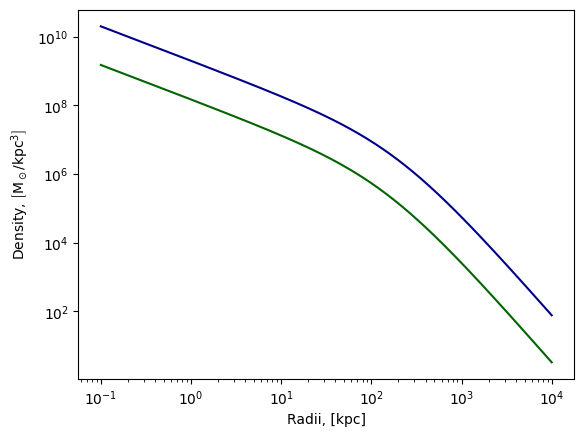

In [3]:
# Import the density profile class from the density
# module of the profiles library.
from pisces.profiles.density import NFWDensityProfile

# Create the halo and gas profiles.
total_profile = NFWDensityProfile(rho_0=1e7, r_s=200)
gas_profile = NFWDensityProfile(rho_0=1e6, r_s=150)

# Plot the profiles
x = np.geomspace(1e-1, 1e4, 1000)
total_density, gas_density = total_profile(x), gas_profile(x)

fig, axes = plt.subplots(1, 1)

axes.loglog(x, total_density, color="darkblue", label=r"$\rho_{\rm tot}(r)$")
axes.loglog(x, gas_density, color="darkgreen", label=r"$\rho_{\rm g}(r)$")
axes.set_xlabel("Radii, [kpc]")
axes.set_ylabel(r"Density, $\left[{\rm M_\odot / kpc^3}\right]$")

## Building the Model

Now that the geometry is built and the density profiles are ready to go, the last step is to create the model. In ``pisces``, models take
a number of inputs (coordinate system, physical profiles, boundaries, etc.) and use them to compute other physical properties of the system. The model then stores all of that information in "fields," which can be accessed for analysis or interpolated onto particles or other grids for use in simulations.

To create a model in Pisces, we need to import the correct ``Model`` subclass for the system we're trying to build. In this case, we want a ``ClusterModel`` from ``pisces.models.galaxy_clusters``. Different starting inputs can be used, each of which has its own generator method on the class. For us, we have the density and total density so we want to use ``from_dens_and_tden``.

In [4]:
# Import the model class.
from pisces.models.galaxy_clusters import ClusterModel

# Generate the model.
cluster_model = ClusterModel.from_dens_and_tden(
    "cluster_model.hdf5",  # The path to the model file.
    1e-1,  # Inner boundary (radius, kpc).
    1e4,  # Outer boundary (radius, kpc).
    gas_profile,  # Gas density profile.
    total_profile,  # total density profile.
    1000,  # Number of grid points.
    coordinate_system=coordinate_system,
    overwrite=True,
)

ClusterModel : [INFO     ] [BLDR] Building model skeleton at path: cluster_model.hdf5
ClusterModel : [DEBUG    ] [BLDR] HDF5 file created successfully.
ClusterModel : [DEBUG    ] [BLDR] Grid manager skeleton built successfully.
ClusterModel : [DEBUG    ] Profile 'gas_density' added successfully.
ClusterModel : [DEBUG    ] Profile 'total_density' added successfully.
ClusterModel : [INFO     ] [BLDR] Model skeleton created successfully at 'cluster_model.hdf5'.
ClusterModel : [INFO     ] [LOAD] Loading model from file: cluster_model.hdf5...
Pisces : [INFO     ] 2025-03-02 16:35:08,615 Preparing Lame Coefficients for SphericalCoordinateSystem instance. This may take a few seconds...
Pisces : [INFO     ] 2025-03-02 16:35:08,620 Preparing derived attributes for SphericalCoordinateSystem instance. This may take a few seconds...
Pisces : [INFO     ] 2025-03-02 16:35:08,622 Lambdifying attributes...
ClusterModel : [INFO     ] [LOAD] COMPLETE: cluster_model.hdf5
ClusterModel : [INFO     ] [EXEC]

[EXEC]:   0%|          | 0/6 [00:00<?, ?it/s]

ClusterModel : [INFO     ] [EXEC] 	(1/6) START: `convert_profiles_to_fields`.
ClusterModel : [DEBUG    ] [EXEC] 		Added field `gas_density` (units=Msun/kpc**3) from profile.
ClusterModel : [DEBUG    ] [EXEC] 		Added field `total_density` (units=Msun/kpc**3) from profile.
ClusterModel : [DEBUG    ] [EXEC] 		Added field `stellar_density` (units=Msun/kpc**3) as null.
ClusterModel : [INFO     ] [EXEC] 	(1/6) COMPLETE: `convert_profiles_to_fields`.
ClusterModel : [INFO     ] [EXEC] 	(2/6) START: `perform_mass_accounting`.
ClusterModel : [DEBUG    ] [EXEC] Added field 'dark_matter_density' (units=Msun/kpc**3, ndim=1).
ClusterModel : [INFO     ] [EXEC] 	(2/6) COMPLETE: `perform_mass_accounting`.
ClusterModel : [INFO     ] [EXEC] 	(3/6) START: `integrate_density_fields`.
ClusterModel : [INFO     ] [EXEC] 	(3/6) COMPLETE: `integrate_density_fields`.
ClusterModel : [INFO     ] [EXEC] 	(4/6) START: `solve_poisson_problem`.
ClusterModel : [DEBUG    ] [EXEC] Added field 'gravitational_potential' (u

The output above tells us exactly what steps were taken to solve to problem:

1. The profiles $\rho_g$ and $\rho_{\rm dyn}$ were added to the cluster as fields.
2. We then used "mass accounting" to construct $\rho_{\star}$ (which is zero here because we didn't provide it), and $\rho_{\rm dm}$.
3. We integrated all of those density profiles to generate the mass profiles.
4. We solved the Poisson problem to get $\Phi$ and $\nabla \Phi$.
5. We solved the HSE equation

   $$ \frac{\nabla P}{\rho_g} = - \nabla \Phi. $$

6. We used $P$ and $\rho_g$ to compute the temperature.

Congratulations, you've created a model galaxy cluster!

## Working with Models

Now that the model has been created, it's worth exploring what we can accomplish with it. At their core, ``Model`` instances contain ``fields`` holding data. We can look at the available fields by accessing the ``FIELDS`` attribute:

In [5]:
print(f"Available Fields: {list(cluster_model.FIELDS.keys())}")

Available Fields: ['gas_density', 'total_density', 'stellar_density', 'gas_mass', 'stellar_mass', 'dark_matter_density', 'dark_matter_mass', 'total_mass', 'gravitational_potential', 'pressure', 'temperature']


As you can see, a lot of fields have been generated in the process of constructing the model. We can plot these as radial profiles or even create images.

To plot profiles radially, we can simply access the data explicitly:

Text(0, 0.5, 'Temperature, $\\left[{\\rm keV}\\right]$')

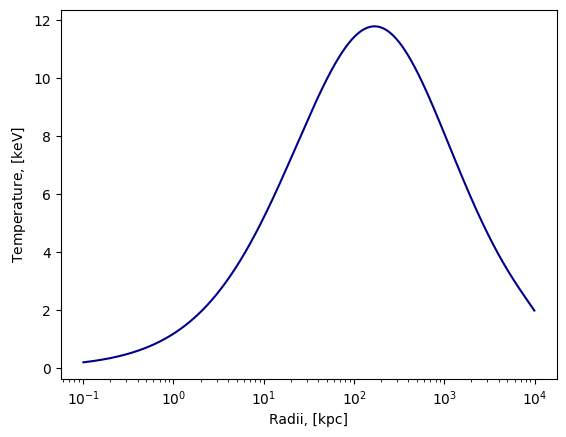

In [6]:
# Pull out the radii in the model grid.
radii = cluster_model.grid_manager.get_coordinates(axes=["r"]).ravel()

# Extract the temperature profile from the model
temperature = cluster_model.FIELDS["temperature"][...]

# Create the plot of the temperature profile.
fig, axes = plt.subplots(1, 1)

axes.semilogx(radii, temperature, color="darkblue", label=r"$T_g(r)$")
axes.set_xlabel("Radii, [kpc]")
axes.set_ylabel(r"Temperature, $\left[{\rm keV}\right]$")

To plot images, there are specialized methods built into the model class that do the relevant geometric conversions for us. To create a slice image, we just need to use the ``plot_slice`` method:

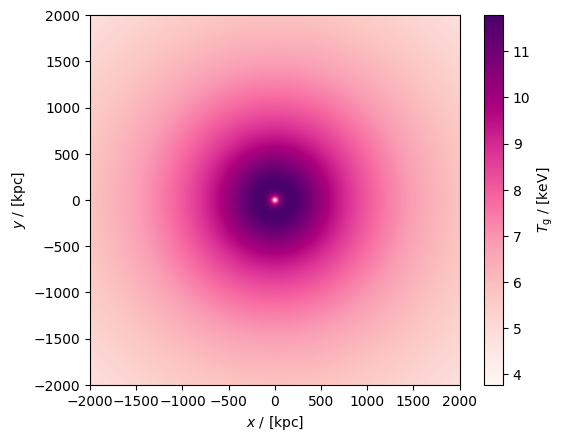

In [7]:
# Set the extent of the image (in kpc)
extent = [-2000, 2000, -2000, 2000]

# Create the plot.
cluster_model.plot_slice("temperature", extent, cmap="RdPu")

# show the plot.
plt.show()

## Generating Particles

All Pisces models can be converted into particle datasets using a ``Virializer`` object. The ``Virializer`` does 3 things:

1. Sample particles from the correct density field to create a set of particles.
2. Interpolate fields onto the sampled particles.
3. Determine the correct velocities for sampled particles (if they are collisionless).

**Currently, virialization is not yet implemented.**

Depending on the model you're working with, the ``Virializer`` might support some (or all) of these functionalities. For simulations, the relevant virializer needs to have all 3 functionalities; however, for many purposes, only the first 2 are relevant. They are also the easiest to implement. As an example, we'll convert our model into a particle dataset and them show how to export it to a ``yt`` dataset.

The first step is to import the correct virializer. For a spherical cluster, we can get the ``SphericalClusterVirializer`` from the ``pisces.models.galaxy_clusters`` module.

In [8]:
from pisces.models.galaxy_clusters.virializers import SphericalClusterVirializer

# Initialize the virializer. The call takes the model (first arg) and the filename (second arg).
virializer = SphericalClusterVirializer(
    cluster_model, "cluster_particles.hdf5", overwrite=True
)

The first step in our conversion is to generate particles for our dataset. To do so, we just use the ``generate_particles`` method.

In [9]:
virializer.generate_particles({"gas": 1_000_000, "dark_matter": 1_000_000})

Generating particles:   0%|          | 0/2 [00:00<?, ?species/s]

Pisces : [INFO     ] 2025-03-02 16:35:10,342 Sampling positions for species 'gas' (1000000 particles).
Pisces : [INFO     ] 2025-03-02 16:35:10,490 Sampling positions for species 'dark_matter' (1000000 particles).
Pisces : [INFO     ] 2025-03-02 16:35:10,626 Completed particle position sampling.


This will create the ``gas`` and ``dark_matter`` species in the HDF5 file and create ``particle_position`` and ``particle_position_native`` for each particle. The native position is the coordinate position in the coordinate system of the model and the particle position is the converted cartesian position.

Next, we want to interpolate our fields onto the particles.

In [12]:
virializer.interpolate_fields()

Interpolating particle fields:   0%|          | 0/6 [00:00<?, ?fields/s]

Interpolating: temperature -> gas:   0%|          | 0/1000000 [00:00<?, ?particles/s]

Pisces : [INFO     ] 2025-03-02 16:40:47,876 Interpolating: temperature -> gas,internal_energy.


Interpolating: gas_density -> gas:   0%|          | 0/1000000 [00:00<?, ?particles/s]

Pisces : [INFO     ] 2025-03-02 16:40:48,325 Interpolating: gas_density -> gas,density.


Interpolating: pressure -> gas:   0%|          | 0/1000000 [00:00<?, ?particles/s]

Pisces : [INFO     ] 2025-03-02 16:40:48,755 Interpolating: pressure -> gas,pressure.


Interpolating: gravitational_potential -> gas:   0%|          | 0/1000000 [00:00<?, ?particles/s]

Pisces : [INFO     ] 2025-03-02 16:40:49,184 Interpolating: gravitational_potential -> gas,gravitational_potential.


Interpolating: dark_matter_density -> dark_matter:   0%|          | 0/1000000 [00:00<?, ?particles/s]

Pisces : [INFO     ] 2025-03-02 16:40:49,619 Interpolating: dark_matter_density -> dark_matter,density.


Interpolating: gravitational_potential -> dark_matter:   0%|          | 0/1000000 [00:00<?, ?particles/s]

Pisces : [INFO     ] 2025-03-02 16:40:49,976 Interpolating: gravitational_potential -> dark_matter,gravitational_potential.


To illustrate how to interact with the particle datasets, we'll create a plot of the system's temperature. It should match the one we created from the grid-ed data above!

In [15]:
# Start by accessing the particle dataset attached to the
# virializer. This is how we access the actual HDF5 data holding
# the particles.
particles = virializer.particles

# Now we want to create a histogram of the particles weighted by their temperatures and then
# divide by the number of particles.
bins = np.linspace(-2000, 2000, 500)
base_hist, _, _ = np.histogram2d(
    *particles["gas"]["particle_position"][...].T[:2, :].d, bins=bins
)
temp_hist, _, _ = np.histogram2d(
    *particles["gas"]["particle_position"][...].T[:2, :].d,
    bins=bins,
    weights=particles["gas"]["internal_energy"][...].d
)

# Create a mask of the regions where there are no particles.
_no_part_mask = base_hist == 0

# Now create the temperature image.
image_array = np.zeros_like(temp_hist)
image_array[~_no_part_mask] = temp_hist[~_no_part_mask] / base_hist[~_no_part_mask]

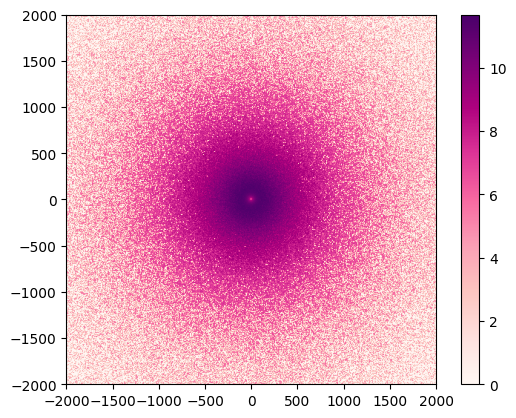

In [16]:
# Plot the image
c = plt.imshow(image_array, cmap="RdPu", extent=[-2000, 2000, -2000, 2000])
plt.colorbar(c)

In [17]:
particles.handle.close()

## Exporting Particle Data to YT

Another useful feature of the pisces particle data is the ability to export to ``yt`` datasets. To illustrate how this can be done in this case, we'll reopen the particle file and convert it to ``yt``:

In [18]:
from pisces.particles.base import ParticleDataset

particles = ParticleDataset("cluster_particles.hdf5")

In [20]:
# Import yt and convert.
import yt

pds = particles.to_yt(length_units="kpc")

yt : [INFO     ] 2025-03-02 16:50:05,976 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-03-02 16:50:05,976 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-03-02 16:50:05,977 Parameters: domain_left_edge          = [-9982.13346586 -9980.89794644 -9991.38806096]
yt : [INFO     ] 2025-03-02 16:50:05,977 Parameters: domain_right_edge         = [9980.73200651 9980.37284496 9960.21132375]
yt : [INFO     ] 2025-03-02 16:50:05,977 Parameters: cosmological_simulation   = 0


As you can see, ``yt`` has recognized our particle data and created a 20 Mpc box containing our particles. We can now inspect our data in many different ways. As an example, let's look at what the projected temperature looks like.

yt : [INFO     ] 2025-03-02 16:58:01,999 xlim = -9982.133466 9980.732007
yt : [INFO     ] 2025-03-02 16:58:02,000 ylim = -9980.897946 9980.372845
yt : [INFO     ] 2025-03-02 16:58:02,002 xlim = -9982.133466 9980.732007
yt : [INFO     ] 2025-03-02 16:58:02,003 ylim = -9980.897946 9980.372845
yt : [INFO     ] 2025-03-02 16:58:02,004 Splatting (('gas', 'internal_energy')) onto a 800 by 800 mesh using method 'ngp'



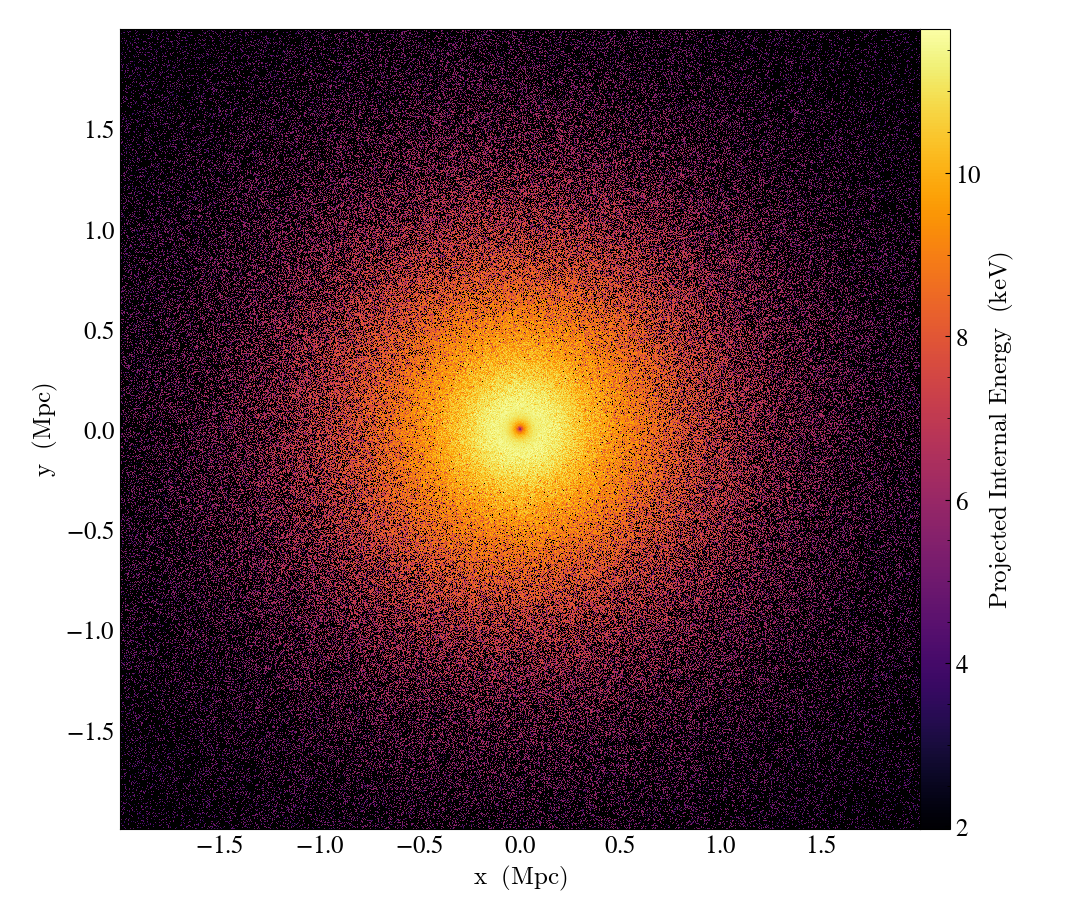

In [37]:
p = yt.ParticlePlot(
    pds,
    ("gas", "particle_position_x"),
    ("gas", "particle_position_y"),
    ("gas", "internal_energy"),
    weight_field=("gas", "particle_mass"),
)
p.zoom(5)
p.set_log(("gas", "internal_energy"), False)
p.set_cmap(("gas", "internal_energy"), "inferno")
p.set_background_color(("gas", "internal_energy"), "black")